In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [5]:
AvgG_data = pd.read_csv('C:/Users/matte/Downloads/Avg Greater 2.5 Goals/AvgC_greater_than_2.5_clean.csv')
AvgG_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,TGG,HTHG,HTAG,THGG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,AvgC_less_than_2.5,AvgC_greater_than_2.5
0,0.0,1.0,11.0,0.0,0.0,0.0,0,4,4,0,1,1,6,25,1,10,16,11,0,6,2,1,0,0,3.29,1.34
1,0.0,2.0,13.0,3.0,1.0,1.0,4,4,8,3,3,6,20,9,8,6,9,14,8,7,1,2,0,0,2.31,1.62
2,0.0,2.0,9.0,7.0,0.0,0.0,1,2,3,0,2,2,24,17,5,8,9,9,4,2,0,1,0,0,2.26,1.65
3,0.0,2.0,4.0,2.0,2.0,2.0,3,2,5,2,1,3,11,13,7,6,13,10,4,5,1,2,0,0,2.19,1.68
4,0.0,2.0,10.0,15.0,2.0,2.0,5,0,5,2,0,2,19,4,9,1,5,12,7,0,1,1,0,0,2.26,1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,25.4,7.4,0.0,1.0,1,3,4,1,1,2,7,20,5,11,6,14,3,10,1,1,0,0,2.45,1.55
8951,4.0,1.0,9.4,15.4,1.0,2.0,1,1,2,1,0,1,13,13,5,11,15,17,7,3,3,3,0,0,3.14,1.35
8952,4.0,1.0,16.4,10.4,2.0,2.0,3,0,3,3,0,3,4,13,4,3,8,13,4,9,4,0,2,1,2.55,1.50
8953,4.0,1.0,21.4,27.4,0.0,1.0,3,4,7,2,2,4,12,18,8,11,3,7,5,4,0,2,0,0,3.34,1.32


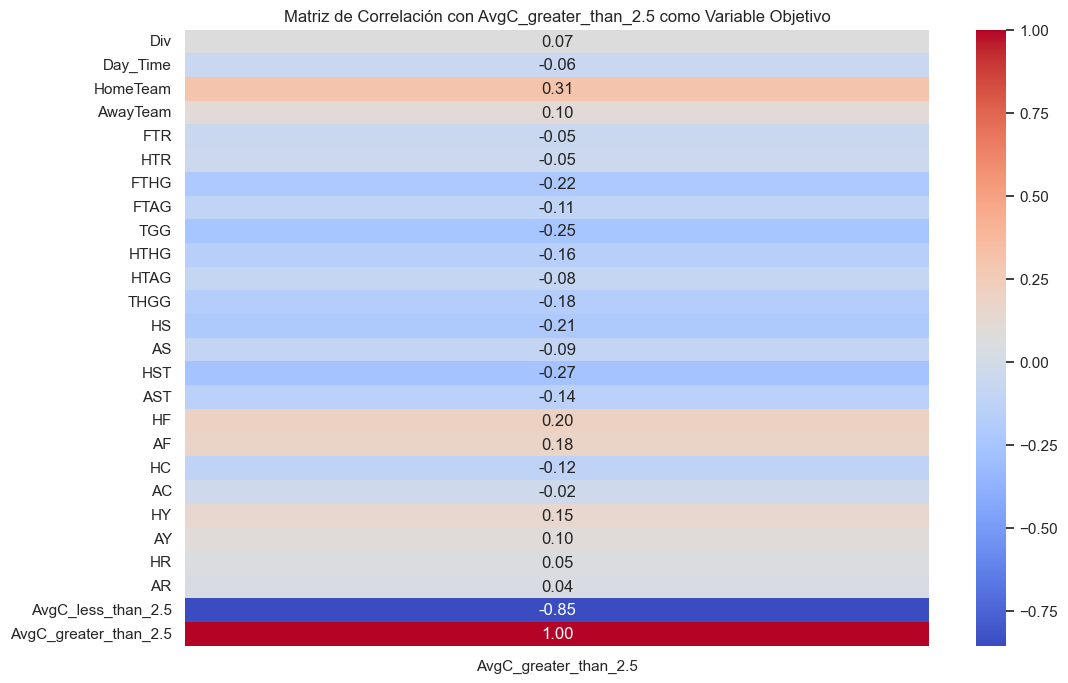

In [8]:
# Lista de variables objetivo
objective_variables = ['AvgC_greater_than_2.5']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = AvgG_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Lista de variables objetivo
objective_variables = ['AvgC_greater_than_2.5']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = AvgG_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = AvgG_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AvgC_greater_than_2.5:
                  Feature        VIF
0   AvgC_greater_than_2.5  28.075621
1                     Div   3.399003
2                Day_Time   6.392247
3                HomeTeam   4.216310
4                AwayTeam   3.906049
5                     FTR  11.358905
6                     HTR  16.962277
7                    FTHG        inf
8                    FTAG        inf
9                     TGG        inf
10                   HTHG        inf
11                   HTAG        inf
12                   THGG        inf
13                     HS  17.750269
14                     AS  15.200605
15                    HST  11.179843
16                    AST   9.926705
17                     HF  13.024896
18                     AF  12.963623
19                     HC   6.332470
20                     AC   5.572715
21                     HY   3.890636
22                     AY   4.237433
23                     HR   1.185694
24                     AR   1.191684
25    

In [16]:
AvgG_data.columns

Index(['Div', 'Day_Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'FTHG', 'FTAG',
       'TGG', 'HTHG', 'HTAG', 'THGG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
       'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgC_less_than_2.5',
       'AvgC_greater_than_2.5'],
      dtype='object')

In [19]:
# Eliminar las columnas especificadas
columns_to_drop = ['Day_Time', 'HTR', 'TGG', 'THGG', 'AvgC_less_than_2.5']
AvgG_data = AvgG_data.drop(columns=columns_to_drop, errors='ignore')
AvgG_data

,Div,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,AvgC_greater_than_2.5
0,0.0,11.0,0.0,0.0,0,4,0,1,6,25,1,10,16,11,0,6,2,1,0,0,1.34
1,0.0,13.0,3.0,1.0,4,4,3,3,20,9,8,6,9,14,8,7,1,2,0,0,1.62
2,0.0,9.0,7.0,0.0,1,2,0,2,24,17,5,8,9,9,4,2,0,1,0,0,1.65
3,0.0,4.0,2.0,2.0,3,2,2,1,11,13,7,6,13,10,4,5,1,2,0,0,1.68
4,0.0,10.0,15.0,2.0,5,0,2,0,19,4,9,1,5,12,7,0,1,1,0,0,1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,25.4,7.4,0.0,1,3,1,1,7,20,5,11,6,14,3,10,1,1,0,0,1.55
8951,4.0,9.4,15.4,1.0,1,1,1,0,13,13,5,11,15,17,7,3,3,3,0,0,1.35
8952,4.0,16.4,10.4,2.0,3,0,3,0,4,13,4,3,8,13,4,9,4,0,2,1,1.50
8953,4.0,21.4,27.4,0.0,3,4,2,2,12,18,8,11,3,7,5,4,0,2,0,0,1.32


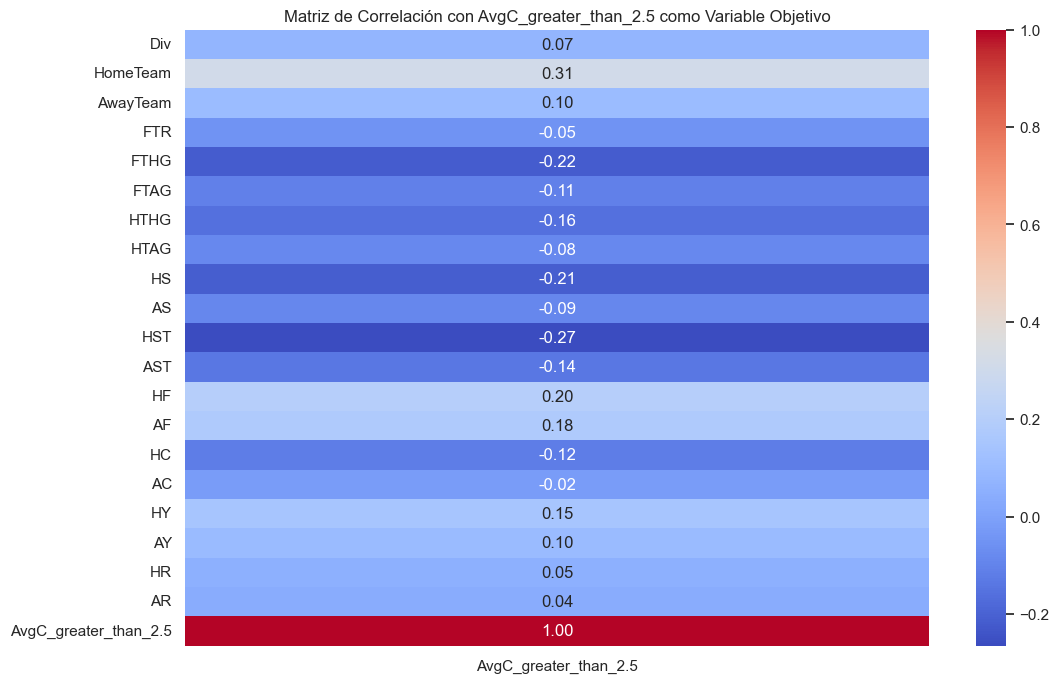

In [21]:
# Lista de variables objetivo
objective_variables = ['AvgC_greater_than_2.5']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = AvgG_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [23]:
# Lista de variables objetivo
objective_variables = ['AvgC_greater_than_2.5']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = AvgG_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = AvgG_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AvgC_greater_than_2.5:
                  Feature        VIF
0   AvgC_greater_than_2.5  24.443049
1                     Div   3.356403
2                HomeTeam   4.184284
3                AwayTeam   3.891064
4                     FTR   9.907139
5                    FTHG   9.667985
6                    FTAG   8.162837
7                    HTHG   3.352411
8                    HTAG   3.074082
9                      HS  16.309519
10                     AS  14.431348
11                    HST  11.167186
12                    AST   9.899993
13                     HF  12.420524
14                     AF  12.314761
15                     HC   6.122708
16                     AC   5.436537
17                     HY   3.887208
18                     AY   4.236683
19                     HR   1.185105
20                     AR   1.189848


In [26]:
# Eliminar las columnas especificadas
columns_to_drop = ['HS', 'AS', 'HY', 'AY', 'HR', 'AR']
AvgG_data = AvgG_data.drop(columns=columns_to_drop, errors='ignore')
AvgG_data

,Div,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HST,AST,HF,AF,HC,AC,AvgC_greater_than_2.5
0,0.0,11.0,0.0,0.0,0,4,0,1,1,10,16,11,0,6,1.34
1,0.0,13.0,3.0,1.0,4,4,3,3,8,6,9,14,8,7,1.62
2,0.0,9.0,7.0,0.0,1,2,0,2,5,8,9,9,4,2,1.65
3,0.0,4.0,2.0,2.0,3,2,2,1,7,6,13,10,4,5,1.68
4,0.0,10.0,15.0,2.0,5,0,2,0,9,1,5,12,7,0,1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,25.4,7.4,0.0,1,3,1,1,5,11,6,14,3,10,1.55
8951,4.0,9.4,15.4,1.0,1,1,1,0,5,11,15,17,7,3,1.35
8952,4.0,16.4,10.4,2.0,3,0,3,0,4,3,8,13,4,9,1.50
8953,4.0,21.4,27.4,0.0,3,4,2,2,8,11,3,7,5,4,1.32


In [28]:
# Lista de variables objetivo
objective_variables = ['AvgC_greater_than_2.5']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = AvgG_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = AvgG_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AvgC_greater_than_2.5:
                  Feature        VIF
0   AvgC_greater_than_2.5  22.901825
1                     Div   3.331747
2                HomeTeam   4.105246
3                AwayTeam   3.815818
4                     FTR   9.708132
5                    FTHG   9.591381
6                    FTAG   8.092332
7                    HTHG   3.324785
8                    HTAG   3.056286
9                     HST   7.547517
10                    AST   6.580403
11                     HF  10.780780
12                     AF  10.613099
13                     HC   4.893413
14                     AC   4.482142


In [31]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = AvgG_data.drop(columns=['AvgC_greater_than_2.5'])  # Características excluyendo la variable objetivo
y = AvgG_data['AvgC_greater_than_2.5']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.05867833882188721
R^2 Score: 0.5386029904933225


In [39]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

# Inicializar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Número de divisiones para la validación cruzada
                           scoring='r2',  # Métrica de evaluación
                           verbose=1,
                           n_jobs=-1)  # Utilizar todos los núcleos de CPU disponibles

# Entrenar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Hacer predicciones y evaluar el modelo ajustado
y_pred_grid = best_rf_model.predict(X_test)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"R^2 Score después de ajuste de hiperparámetros: {r2_grid}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores hiperparámetros encontrados:
{'max_depth': None, 'min_samples_split': 15, 'n_estimators': 300}
R^2 Score después de ajuste de hiperparámetros: 0.5486475559078157


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo con los mejores hiperparámetros
rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=15)

# Entrenar el modelo con los datos limpios TGG_data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=300)

In [49]:
importances = rf.feature_importances_

In [50]:
feature_names = list(X_train.columns)  # Obtener nombres de características si X_train es un DataFrame

# Crear un DataFrame de importancias de características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

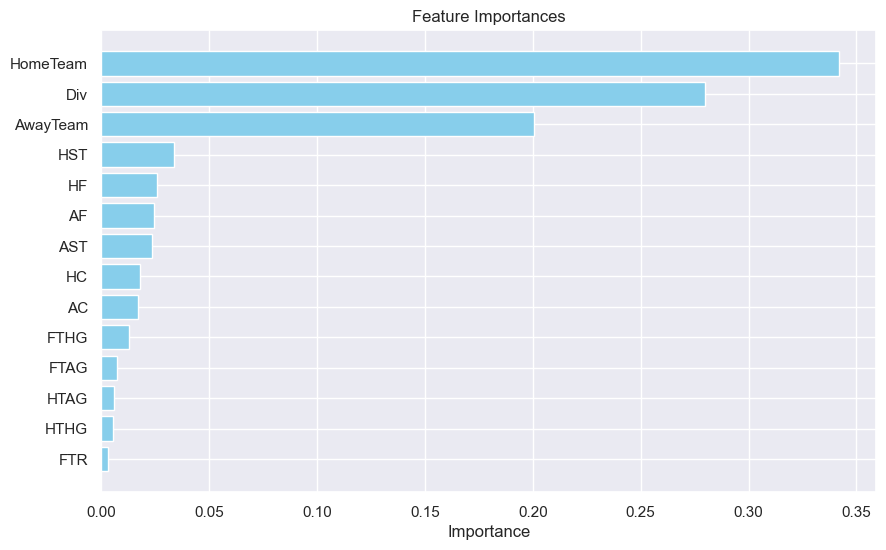

In [54]:
# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [56]:
# Definir la variable objetivo específica
target_variable = 'AvgC_greater_than_2.5'

# Seleccionar variables numéricas excluyendo la variable objetivo
X = AvgG_data.drop(columns=[target_variable])
y = AvgG_data[target_variable]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar importancia de las variables para 'TGG' en el modelo de Random Forest
print(f"\nImportancia de las variables para '{target_variable}' en el modelo de Random Forest:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {X.columns[idx]}: {importances[idx]}")


Importancia de las variables para 'AvgC_greater_than_2.5' en el modelo de Random Forest:
1. HomeTeam: 0.25910166935381074
2. Div: 0.18507438059747264
3. AwayTeam: 0.1772824201124553
4. AF: 0.05503565652858888
5. HF: 0.05467461042232899
6. HST: 0.04972692008628327
7. HC: 0.0466173677353592
8. AC: 0.044230122353041856
9. AST: 0.04371872341371207
10. FTHG: 0.02429730829225387
11. FTAG: 0.018575272916075206
12. HTHG: 0.015250658138761471
13. HTAG: 0.014730480955050603
14. FTR: 0.011684409094806


In [58]:
AvgG_data

,Div,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HST,AST,HF,AF,HC,AC,AvgC_greater_than_2.5
0,0.0,11.0,0.0,0.0,0,4,0,1,1,10,16,11,0,6,1.34
1,0.0,13.0,3.0,1.0,4,4,3,3,8,6,9,14,8,7,1.62
2,0.0,9.0,7.0,0.0,1,2,0,2,5,8,9,9,4,2,1.65
3,0.0,4.0,2.0,2.0,3,2,2,1,7,6,13,10,4,5,1.68
4,0.0,10.0,15.0,2.0,5,0,2,0,9,1,5,12,7,0,1.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,25.4,7.4,0.0,1,3,1,1,5,11,6,14,3,10,1.55
8951,4.0,9.4,15.4,1.0,1,1,1,0,5,11,15,17,7,3,1.35
8952,4.0,16.4,10.4,2.0,3,0,3,0,4,3,8,13,4,9,1.50
8953,4.0,21.4,27.4,0.0,3,4,2,2,8,11,3,7,5,4,1.32


In [70]:
# Ajusta new_data para que coincida con las columnas de entrenamiento
new_data9 = pd.DataFrame({
    'Div': [1.0], 
    'HomeTeam': [1.10],  
    'AwayTeam': [0.10],
    'FTR': [2.0],
    'FTHG': [5],
    'FTAG': [1],
    'HTHG': [2],
    'HTAG': [0],  
    'HST': [8],
    'AST': [4],
    'HF': [17],
    'AF': [14],
    'HC': [4],
    'AC': [2],
})

# Hacer la predicción utilizando el modelo entrenado
predicted_AvgG = rf_model.predict(new_data9)
print(f"Predicción de predicted_AvgG para el nuevo partido: {predicted_AvgG}")

Predicción de predicted_AvgG para el nuevo partido: [1.6569]
